In [1]:
# Packets for the code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#other
import os
os.environ['TORCH_USE_CUDA_DSA'] = '1'
!pip install --upgrade transformers
!pip install transformers[torch]
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, Trainer, TrainingArguments, DataCollatorWithPadding
from transformers import EvalPrediction
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
import torch
!pip install transformers -U

#for metrics

from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from scipy.special import softmax
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 29.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.38.2
    Uninstalling transformers-4.38.2:
      Successfully uninstalled transformers-4.38.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


link = '[link to dataset at google drive]'


# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('part3_val.csv')

df = pd.read_csv('part3_val.csv')
df

,member_name,sitting_date,parliamentary_period,parliamentary_session,parliamentary_sitting,political_party,government,member_region,roles,member_gender,speaker_info,speech,ideology,speech_length,ideology_2,renamed_party
0,βαρεμενος βασιλειου γεωργιος,2016-02-19,period 17,session 1,sitting 76,συνασπισμος ριζοσπαστικης αριστερας,['τσιπρα π. αλεξιου(21/09/2015-08/07/2019)'],αιτωλοακαρνανιας,['β αντιπροεδρος(10/04/2015-18/07/2019)'],male,προεδρευων,περιμενετε καμμενε ερωτηση τυχη απαντηθει...,left,31,left,συνασπισμος ριζοσπαστικης αριστερας(συνολικο)
1,μαρκογιαννακης εμμανουηλ χρηστος,2014-06-03,period 15,session 2,sitting 101,νεα δημοκρατια,['σαμαρα κ. αντωνιου(21/06/2012-26/01/2015)'],χανιων,['γ αντιπροεδρος βουλης(29/06/2012-02/05/2015)'],male,προεδρευων,ευχαριστουμε υπουργες ι συναδελφοι κηρυσσ...,right,50,centre-right,νεα δημοκρατια
2,κακλαμανης μιχαηλ νικητας,2020-02-28,period 18 review 9,session 1,sitting 109,νεα δημοκρατια,['μητσοτακη κυριακου(08/07/2019-28/07/2020)'],α' αθηνων,['α αντιπροεδρος βουλης(18/07/2019-28/07/2020)'],male,προεδρευων,ξερω τζουφη αναφερεστε απλα βιωσα γριπη ...,right,21,centre-right,νεα δημοκρατια
3,κεγκερογλου αλεξανδρου βασιλειος,2017-12-05,period 17,session 2,sitting 120,δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστι...,['τσιπρα π. αλεξιου(21/09/2015-08/07/2019)'],ηρακλειου,['βουλευτης'],male,NaN,υπουργε υπερφορολογηση αγροτικο τομεα παρο...,left,321,centre-left,πασοκ συνολικο
4,λοβερδος νικολαου ανδρεας,2017-03-14,period 17,session 2,sitting 89,δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστι...,['τσιπρα π. αλεξιου(21/09/2015-08/07/2019)'],β' αθηνων,['βουλευτης'],male,NaN,προεδρε αγαπητες αγαπητοι συναδελφοι ειπα...,left,306,centre-left,πασοκ συνολικο
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20698,βαρβιτσιωτης ιωαννη μιλτιαδης,2018-12-21,period 17,session 4,sitting 49,νεα δημοκρατια,['τσιπρα π. αλεξιου(21/09/2015-08/07/2019)'],β' αθηνων,['βουλευτης'],male,NaN,πραγματα απλα μπερδευομαστε σ αιθουσα αντι...,right,54,centre-right,νεα δημοκρατια
20699,γεροβασιλη βασιλειου ολγα,2018-12-17,period 17,session 4,sitting 45,συνασπισμος ριζοσπαστικης αριστερας,['τσιπρα π. αλεξιου(21/09/2015-08/07/2019)'],αρτας,['υπουργος προστασιας του πολιτη(29/08/2018-07...,female,υπουργος προστασιας του πολιτη,κενες οργανικεςτο κανατε οργανογραμματα κα...,left,68,left,συνασπισμος ριζοσπαστικης αριστερας(συνολικο)
20700,γειτονας ιωαννη κωνσταντινος,2010-04-20,period 13,session 1,sitting 101,πανελληνιο σοσιαλιστικο κινημα,['παπανδρεου α. γεωργιου(06/10/2009-11/11/2011)'],β' αθηνων,['βουλευτης'],male,NaN,ευχαριστω προεδρε υπουργε εκπροθεσμη απ...,left,226,centre-left,πασοκ συνολικο
20701,διωτη μαρινου ηρω,2013-10-15,period 15,session 2,sitting 7,συνασπισμος ριζοσπαστικης αριστερας,['σαμαρα κ. αντωνιου(21/06/2012-26/01/2015)'],λαρισας,['βουλευτης'],female,NaN,ευχαριστω προεδρες ι βουλευτες επαναλαβει...,left,430,left,συνασπισμος ριζοσπαστικης αριστερας(συνολικο)


In [4]:

# Define the paths to the directories containing the saved model and tokenizer
model_save_directory = "/content/drive/MyDrive/Colab_Backups/my_model_directory"
tokenizer_save_directory = "/content/drive/MyDrive/Colab_Backups/my_tokenizer_directory"

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(tokenizer_save_directory)
model = AutoModelForSequenceClassification.from_pretrained(model_save_directory)

In [5]:
# Extract texts and labels
texts = df['speech'].values
labels = df['renamed_party'].astype('category').cat.codes.values

# Tokenize the texts
encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=512)


class MyDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create the dataset
df_part3 = MyDataset(encodings, labels)

In [6]:

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=10000,
    #weight_decay=0.01,
    logging_dir='./logs',
    evaluation_strategy="steps",
    eval_steps= 5000,
    save_steps = 5000,
    #save_total_limit=2,
    load_best_model_at_end=True,
    metric_for_best_model="eval_f1",
    greater_is_better=True,
    #full_determinism=True,
    learning_rate = 5e-5,
)


def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    labels = p.label_ids
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Adjust the Trainer initialization for evaluation
trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,  # Include your compute_metrics function
    tokenizer=tokenizer,
    data_collator=DataCollatorWithPadding(tokenizer),  # Ensures correct batch padding
)

/usr/local/lib/python3.10/dist-packages/accelerate/accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [7]:
# Evaluate the model on your dataset
evaluation_results = trainer.evaluate(df_part3)

# Print the evaluation results
print("Evaluation Results:", evaluation_results)

Evaluation Results: {'eval_loss': 1.9418070316314697, 'eval_accuracy': 0.6988842196783075, 'eval_f1': 0.6997000707119954, 'eval_precision': 0.7015913390197285, 'eval_recall': 0.6988842196783075, 'eval_runtime': 206.4279, 'eval_samples_per_second': 100.292, 'eval_steps_per_second': 6.269}


In [8]:
#Make predictions
predictions = trainer.predict(df_part3)


In [12]:


# Class names
class_names = df['renamed_party'].astype('category').cat.categories.tolist()

# Extract predicted labels from logits
predicted_labels = np.argmax(predictions.predictions, axis=-1)

# Extract true labels from the predictions output
true_labels = predictions.label_ids

# 'df' is the DataFrame from which df_part1 (MyDataset) was created
df['predicted_party'] = [class_names[label] for label in predicted_labels]
df['true_party'] = [class_names[label] for label in true_labels]

# Recreate length categories and bins if not already in original_df
bins = [0, 50, 150, 250, 350, 450, float('inf')]
labels = ['0-50', '50-150', '150-250', '250-350', '350-450', '450+']
df['length_category'] = pd.cut(df['speech_length'], bins=bins, labels=labels)

# Calculate accuracy per speech length category
def calculate_accuracy(group):
    correct_predictions = (group['predicted_party'] == group['true_party']).sum()
    total_predictions = len(group)
    return correct_predictions / total_predictions

accuracy_by_length = df.groupby('length_category').apply(calculate_accuracy)
print(accuracy_by_length)


length_category
0-50       0.572411
50-150     0.684274
150-250    0.782021
250-350    0.824373
350-450    0.872872
450+       0.862963
dtype: float64


In [ ]:
import numpy as np
from scipy.special import softmax

# Apply softmax to logits and get the predicted class indices
pred_labels = np.argmax(softmax(predictions.predictions, axis=1), axis=1)

# True labels
true_labels = predictions.label_ids


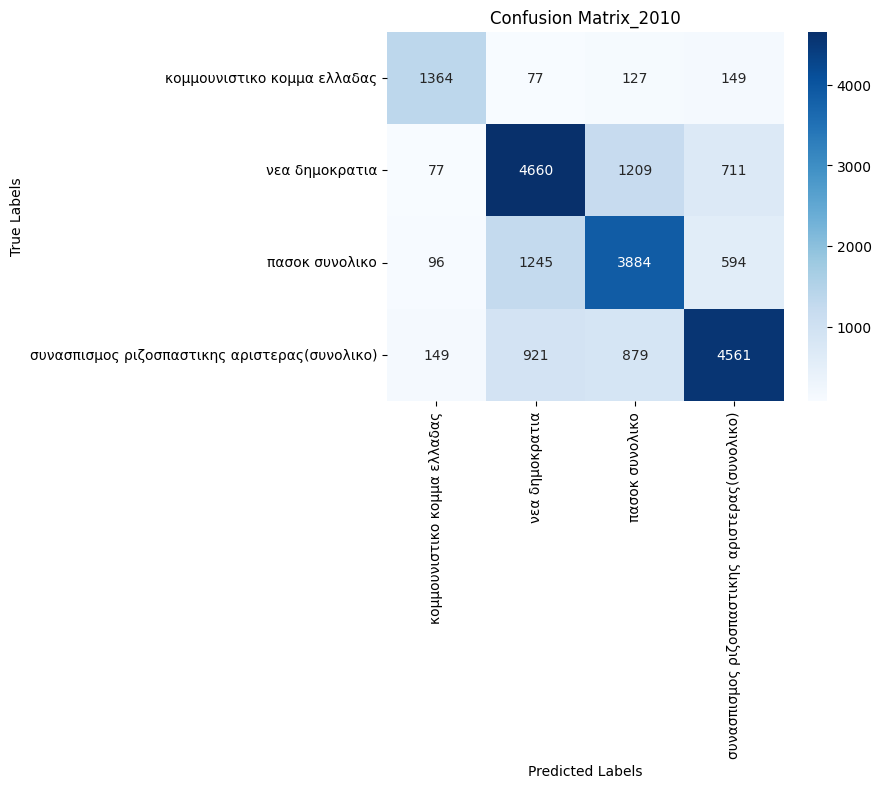

In [ ]:
# Before encoding the 'renamed_party' column into codes
party_names = df['renamed_party'].astype('category').cat.categories

conf_matrix = confusion_matrix(true_labels, pred_labels)

# Plot confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=party_names, yticklabels=party_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix_2010')
plt.savefig("Confusion_Matrix_2010.png")
plt.show()


In [ ]:
# Generate classification report using the defined party names for clarity
class_report = classification_report(true_labels, pred_labels, target_names=party_names)
print(class_report)

                                               precision    recall  f1-score   support

                  κομμουνιστικο κομμα ελλαδας       0.93      0.92      0.92      5371
                               νεα δημοκρατια       0.94      0.95      0.94     36069
                               πασοκ συνολικο       0.95      0.95      0.95     47433
συνασπισμος ριζοσπαστικης αριστερας(συνολικο)       0.90      0.87      0.89      7896

                                     accuracy                           0.94     96769
                                    macro avg       0.93      0.92      0.93     96769
                                 weighted avg       0.94      0.94      0.94     96769

